In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('workers.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400000 entries, 1 to 99995
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   nome        1400000 non-null  object
 1   descricao   1400000 non-null  object
 2   valores     1400000 non-null  object
 3   created_at  1400000 non-null  object
 4   workers     1400000 non-null  int64 
 5   language    1400000 non-null  object
dtypes: int64(1), object(5)
memory usage: 74.8+ MB


In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [5]:
df.head()

,nome,descricao,valores,created_at,workers,language
id,,,,,,
1,User 6,Descrição do usuário 6,"{150,168,140,157}",2023-10-26 23:14:09.463171,1,node
5,User 3,Descrição do usuário 3,"{129,156,132,132}",2023-10-26 23:14:09.462434,1,node
11,User 11,Descrição do usuário 11,"{164,132,160,127}",2023-10-26 23:14:09.513173,1,node
13,User 13,Descrição do usuário 13,"{143,111,165,145}",2023-10-26 23:14:09.516732,1,node
21,User 21,Descrição do usuário 21,"{192,192,155,115}",2023-10-26 23:14:09.523548,1,node


In [6]:
boxdf = df.copy()

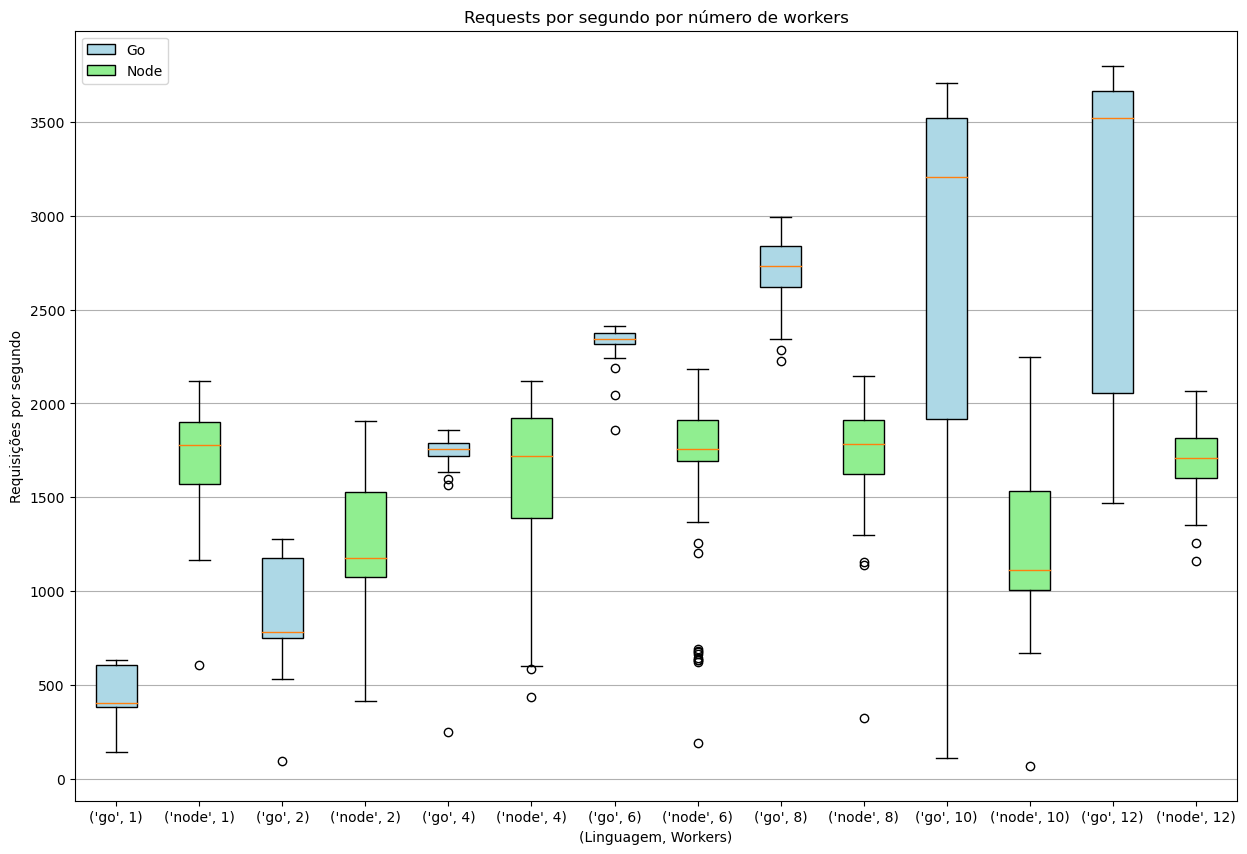

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
data = []
languages = np.sort(boxdf['language'].unique())
workers = np.sort(boxdf['workers'].unique())

labels = sorted([(language, worker)
                for language in languages for worker in workers], key=lambda x: x[1])


for language, worker in labels:
    temp = boxdf[(boxdf['workers'] == worker) & (boxdf['language'] == language)]
    temp.index = temp['created_at']
    temp = temp.resample('1s').size()
    data.append(temp)

boxs = ax.boxplot(data, labels=labels,patch_artist=True)

colors = {
    'node': 'lightgreen',
    "go": 'lightblue',
}
for i, boxl in enumerate(boxs['boxes']):
    boxl.set_facecolor(colors[labels[i][0]])

ax.set_xticklabels(labels)
ax.set_xlabel('(Linguagem, Workers)')
ax.set_ylabel('Requisições por segundo')
ax.yaxis.grid(True)
ax.set_title('Requests por segundo por número de workers')
plt.legend([boxs['boxes'][0], boxs['boxes'][1]], ['Go', 'Node'], loc='upper left')

plt.show()
